In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Overview 

The goal is to numerically solve ODEs of the form 
$$ \frac{dy}{dx} = f(x, y) $$ 

The general form for numerical methods is 
$$ y_{i+1} = y_{i} + \phi h $$ 
where $\phi$ is some function controlling the slope and $h$ is the step size

Derivation: 
$$ \int_{y_i}^{y_{i+1}} dy = \int_{x_i}^{x_{i+1}}f(x,y)dx $$
$$ y_{i+1} = y_i + \int_{x_i}^{x_{i+1}}f(x,y)dx $$

Thus, we conclude that 
$$\phi h = \int_{x_i}^{x_{i+1}} f(x,y) dx $$ 

# Euler's Method 

We approximate $\phi = f(x,y)$. This comes from a simple discretization of the definition of the derivative: 
$$ \frac{dy}{dx}=f(x,y) \to \frac{y_{i+1}-y_{i}}{h}=f(x,y)$$. 

There are now two choices for how to evaluate $f(x,y)$, namely  
 $ f(x_i,y_i) $ or $ f(x_{i+1}, y_{i+1}) $

In [2]:
#ex: f = exp(x) 

def f(x): 
    return np.exp(x)

# define initial conditions 
y_0 = 1
h = 0.05 # step size
x_0 = 0
x_f = 10

xs = np.arange(x_0, x_f, h)
ys = np.zeros_like(xs)
ys[0] = y_0

for i in range(1,len(xs)): 
    ys[i] = ys[i-1]+f(xs[i-1])*h
    
print(xs.shape, ys.shape)

(200,) (200,)


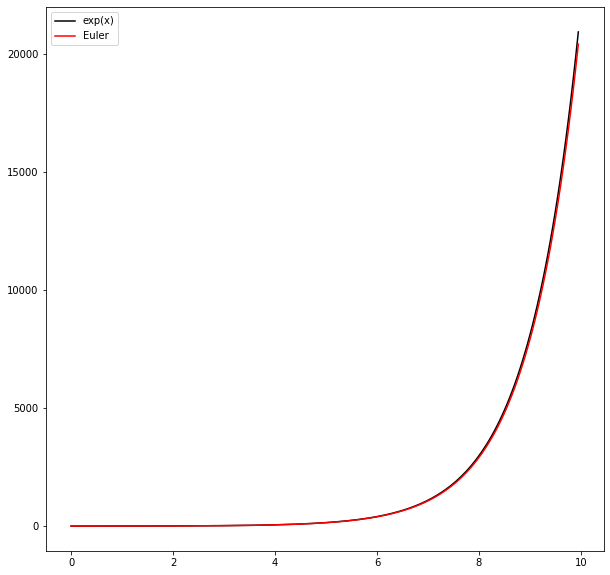

In [3]:
plt.figure(figsize=(10,10))
plt.plot(xs, f(xs), 'k', label='exp(x)')
plt.plot(xs, ys, 'r', label='Euler')
plt.legend()
plt.show()

 Now it should be clear how the error in Euler's method can be a serious problem after only a few iterations. 
 

# Heun's Method
This method is called a **predictor-corrector** methods. To start, we compute the first order estimate 

$$y_{i+1}^{0} = y_i + f(x_i, y_i)h $$

Next we take the slpe at the estimated point $f(x_{i+1}, y_{i+1}^0)$ To get another slope i.e. 

$\phi' = f(x_{i+1}, y_{i+1}^0)$. Averaging the two gives us

$$y_{i+1} = y_i + \frac{f(x_{i},y_{i})+f(x_{i+1}, y_{i+1}^0)}{2}h $$

In [4]:
ys_heun = np.zeros_like(xs) 
ys_heun[0] = y_0

for i in range(1, len(xs)): 
    ys_heun[i] = ys_heun[i-1]+((f(xs[i-1])+f([xs[i]]))/2)*h
    
# note we could iterate multiple ties. e.g. once you calculate $y$,
# substitute it back in for $y^0$. 

# Also, note that this is really similar to the Trapezoidal method 
# for calculating integrals.

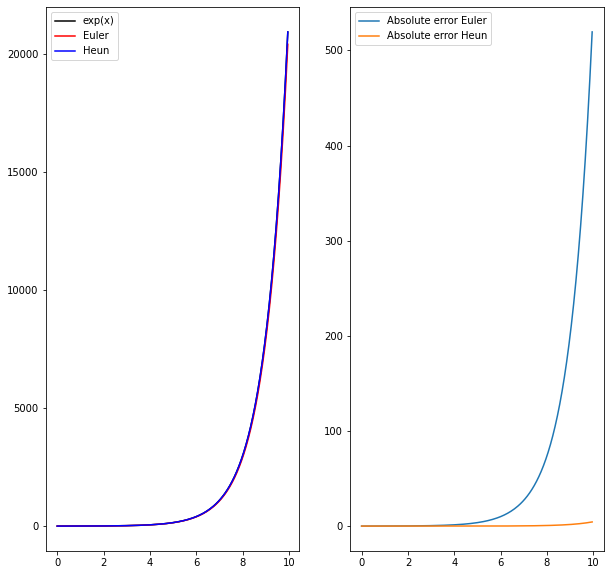

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].plot(xs, f(xs), 'k', label='exp(x)')
ax[0].plot(xs, ys, 'r', label='Euler')
ax[0].plot(xs, ys_heun, 'b', label='Heun')
ax[0].legend()

ax[1].plot(xs, np.abs(f(xs)-ys), label='Absolute error Euler')
ax[1].plot(xs, np.abs(f(xs)-ys_heun), label='Absolute error Heun')
ax[1].legend()
plt.show()

# The midpoint method

Here we use Euler's method to predict a value for the slope in the middle of the interval e.g. $x_{i}+\dfrac{h}{2}$ 
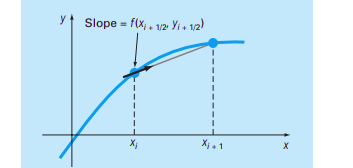

In [6]:
ys_mid = np.zeros_like(xs) 
ys_mid[0] = y_0

for i in range(1, len(xs)): 
    ys_mid[i] = ys_mid[i-1]+f(xs[i-1]+h/2)*h
    

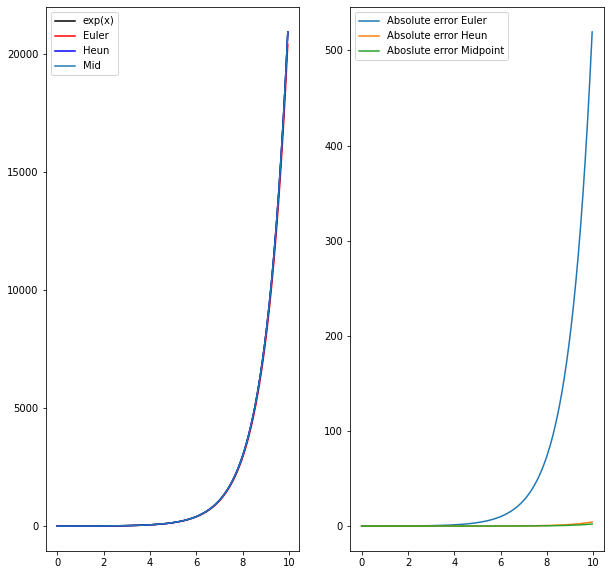

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].plot(xs, f(xs), 'k', label='exp(x)')
ax[0].plot(xs, ys, 'r', label='Euler')
ax[0].plot(xs, ys_heun, 'b', label='Heun')
ax[0].plot(xs, ys_mid, label='Mid')
ax[0].legend()

ax[1].plot(xs, np.abs(f(xs)-ys), label='Absolute error Euler')
ax[1].plot(xs, np.abs(f(xs)-ys_heun), label='Absolute error Heun')
ax[1].plot(xs, np.abs(f(xs)-ys_mid), label='Aboslute error Midpoint')
ax[1].legend()
plt.show()

# General Runge-Kutta Methods

The general form for Runge-Kutta methods is
$$ y_{i+1} = y_i + \phi(x_i, y_i, h)h$$ 
with 
$$\phi(x_i, y_i, h) = \sum_i^n a_ik_i. $$
We call $n$ the *order* of the method. 

The $a's$ are constants and the $k's$ are given by 
\begin{align}
k_1 &= f(x_i, y_i)  \\
k_2 &= f(x_i + p_1h, y_i + q_{11}k_1h) \\ 
k_3 &= f(x_i + p_2h, y_i + q_{21}k_1h + q_{22}k_2 h) \\ 
&\vdots \\ 
k_n &= f(x_i + p_{n-1}h, y_i + q_{n-1}k_1h+q_{n-1, 2}k_2 h + \dots + q_{n-1, n-1}k_{n-1}h) 
\end{align}

Where $p's$ and $q's$ are constants. We note also that the $k's$ are recurrence relationships so that $k_1$ appears in $k_2$ and so on... 

For $n=1$, we have Euler's method. Once we have chosen $n$,the constants can be solved for by setting $y_{i+1} = y_{i}+\phi h$ equal to terms in a Taylor series expansion, e.g. 

\begin{align}
y_{i+1} &= y_i + y_{i}'h + \frac{y_{i}''}{2!}h^2 + \dots \\ 
&= y_i + f(x_i, y_i)h + \frac{f'(x_i, y_i)}{2!}h^2 + \dots + \frac{f^{(n)}(x_i,y_i)}{n!}h^n
\end{align}

# Second-Order Runge-Kutta 
Starting from the top, we have 
$$y_{i+1} = y_i + (a_1k_1+a_2k_2)h $$ 
with 
\begin{align}
k_1 &= f(x_i,y_i) \\
k_2 &= f(x_i + p_1h, y_i + q_{11}k_1h) 
\end{align}
Thus, setting the equations together gives 
\begin{align}
 y_i + \left(a_1 f(x_i,y_i)+a_2f(x_i + p_1h, y_i + q_{11}k_1h) \right)h &= y_i + f(x_i,y_i)h + \frac{f'(x_i, y_i)}{2!}h^2
\end{align}
By the chain rule, we have that 
\begin{align}
f'(x_i, y_i) &= \frac{\partial f}{\partial x} + \frac{\partial f}{\partial y}\frac{dy}{dx}
\end{align} 
so that the right hand side yields 
\begin{equation}
y_{i+1} = y_i + f(x_i,y_i)h + \frac{1}{2}\left(\frac{\partial f}{\partial x} + f(x_i, y_i)\frac{\partial f}{\partial y} \right)h^2
\end{equation}


Furthermore, the multivariable chain rule gives
\begin{align}
f(x+r, y+s) = f(x,y) + \frac{\partial f}{\partial x}r + \frac{\partial f}{\partial y}s + ...
\end{align}
so that 
\begin{align}
f(x_i+p_1h, y_i+q_{11}k_1h) = f(x_i,y_i) + p_1h\frac{\partial f}{\partial x}+ q_{11}k_1h\frac{\partial f}{\partial y} + \mathcal{O}(2)
\end{align}

Substituting this into the above gives
\begin{align}
y_{i+1} &= y_1 + a_1hf(x_i,y_i)+a_2hf(x_i,y_i)+a_2hp_1h\frac{\partial f}{\partial x} + a_2hq_{11}hf(x_i,y_i)\frac{\partial f}{\partial y} + \dots\\
&= y_1 + (a_1+a_2)f(x_i, y_i)h + \left( a_2p_1\frac{\partial f}{\partial x} + a_2q_{11}f(x_i,y_i)\frac{\partial f}{\partial y} \right)h^2 + \dots \\
&= y_i + f(x_i,y_i)h + \frac{1}{2}\left(\frac{\partial f}{\partial x} + f(x_i, y_i)\frac{\partial f}{\partial y} \right)h^2 + \dots
\end{align}

and comparing like terms yields the system of equations
\begin{align}
&a_1 + a_2 = 1 \\ 
&a_2p_1 = \frac{1}{2} \\ 
&a_2q_{11} = \frac{1}{2}
\end{align}


The fact that there are only 3 equations and 4 unkowns means there is an entire *family* of 2nd order Runge-Kutta methods. Solving for $a_2$ gives 
\begin{align}
&a_1 = 1-a_2 \\ 
&p_1 = q_{11} = \frac{1}{2a_2} 
\end{align}

The following choices for $a_2$ result in the common second order methods: 


<table class='center'>
  <tr>
    <th style="text-align:center"> $a_2$ </th>
    <th style="text-align:center"> $y_i$ </th>
    <th style="text-align:center"> Name </th>
  </tr>
    
  <tr>
    <td style="text-align:center"> $1/2$ </td>
    <td style="text-align:center"> $y_{i+1} = y_i + (0.5k_1 + 0.5k_2)h $ </td>
    <td style="text-align:center"> Heun</td>
  </tr>
  <tr>
    <td style="text-align:center"> $1$ </td>
    <td style="text-align:center"> $y_{i+1} = y_i + k_2h $ </td>
    <td style="text-align:center"> Midpoint</td>
  </tr>
    
  <tr>
    <td style="text-align:center"> $2/3$ </td>
    <td style="text-align:center"> $y_{i+1} = y_i + (\frac{1}{3}k_1 + \frac{2}{3}k_2)h $ </td>
    <td style="text-align:center"> Ralston's</td>
  </tr>    
</table>



# Third-Order Runge-Kutta Methods
A similar derivation for $n=3$ gives 
\begin{equation}
y_{i+1} = y_i + \frac{1}{6}\left(k_1 + 4k_2 + k_3 \right)h
\end{equation}
with 
\begin{align}
k_1 &= f(x_i, y_i) \\ 
k_2 &= f\left(x_i + \frac{1}{2}h, y_i + \frac{1}{2}k_1h\right) \\ 
k_3 &= f\left(x_i + h, y_i-k_1h + 2k_2 h\right)
\end{align}

In [8]:
ys_rk3 = np.zeros_like(xs) 
ys_rk3[0] = y_0

for i in range(1, len(xs)): 
    k1 = f(xs[i-1])
    k2 = f(xs[i-1]+0.5*h)
    k3 = f(xs[i-1]+h)
    ys_rk3[i] = ys_rk3[i-1]+(1/6)*(k1+4*k2+k3)*h
    

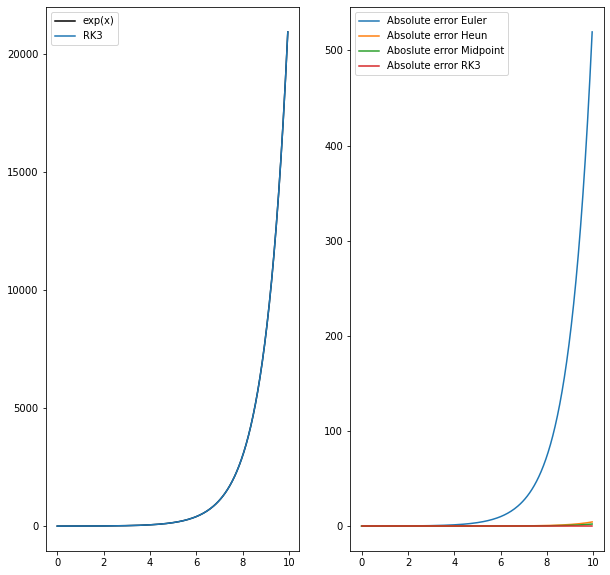

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].plot(xs, f(xs), 'k', label='exp(x)')
ax[0].plot(xs, ys_rk3, label='RK3')
ax[0].legend()

ax[1].plot(xs, np.abs(f(xs)-ys), label='Absolute error Euler')
ax[1].plot(xs, np.abs(f(xs)-ys_heun), label='Absolute error Heun')
ax[1].plot(xs, np.abs(f(xs)-ys_mid), label='Aboslute error Midpoint')
ax[1].plot(xs, np.abs(f(xs)-ys_rk3), label='Absolute error RK3')
ax[1].legend()
plt.show()

# Fourth-Order Runge-Kutta (the most popular)
\begin{equation}
y_{i+1} = y_i + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)h
\end{equation}
with 
\begin{align}
k_1 &= f(x_i, y_i) \\ 
k_2 &= f\left(x_i + \frac{1}{2}h, y_i + \frac{1}{2}k_1 h \right) \\ 
k_3 &= f\left(x_i + \frac{1}{2}h, y_i + \frac{1}{2}k_2 h\right) \\
k_4 &= f\left(x_i +h, y_i+k_3h \right)
\end{align}


In [10]:
ys_rk4 = np.zeros_like(xs) 
ys_rk4[0] = y_0

for i in range(1, len(xs)): 
    k1 = f(xs[i-1])
    k2 = f(xs[i-1]+0.5*h)
    k3 = f(xs[i-1]+0.5*h)
    k4 = f(xs[i-1]+h)
    ys_rk4[i] = ys_rk4[i-1] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)*h
    

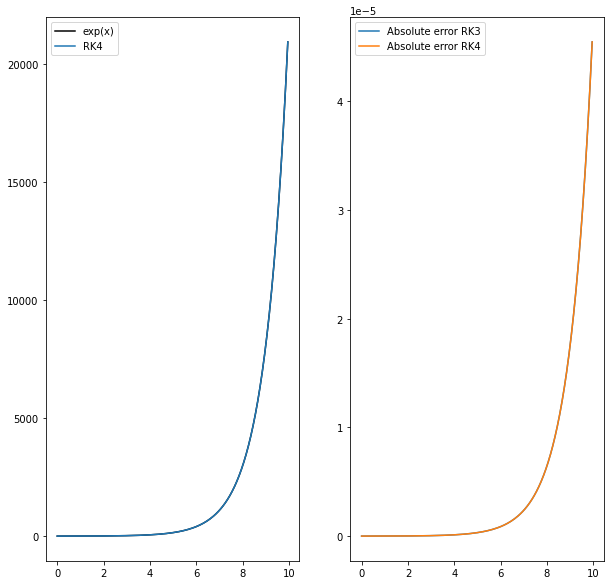

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].plot(xs, f(xs), 'k', label='exp(x)')
ax[0].plot(xs, ys_rk4, label='RK4')
ax[0].legend()


ax[1].plot(xs, np.abs(f(xs)-ys_rk3), label='Absolute error RK3')
ax[1].plot(xs, np.abs(f(xs)-ys_rk4), label='Absolute error RK4')
ax[1].legend()
plt.show()

# Adaptive Runge-Kutta Methods
Can we choose an optimal step size for each iteration *instead* of using one fixed size? The key to doing this lies in *estimating the error*. We could 
1. Change the stepsize 
2. Use higher and lower order methods (e.g. combine RK4 and RK5 to make RK45) 

We will use method 2 for our adaptive step size control. To make the second method feasibly, we will devies our coefficients such that the same $k_i$ from RK4 will be reused for RK5. This will decrease the computational overhead and make the method much more feasible. 

In [48]:
def f(x,y): 
    return np.exp(x)*np.sin(y)**2

def rk45_compute(x_i, y_i, f, h): 
    k1 = f(x_i, y_i) 
    k2 = f(x_i+(1/5)*h, y_i+(1/5)*k1*h)
    k3 = f(x_i + (3/10)*h, y_i + (3/40)*k1*h + (9/40)*k2*h)
    k4 = f(x_i + (3/5)*h, y_i + (3/10)*k1*h-(9/10)*k2*h+(6/5)*k3*h)
    k5 = f(x_i + h, y_i - (11/54)*k1*h + (5/2)*k2*h - (70/27)*k3*h + (35/27)*k4*h)
    k6 = f(x_i + (7/8)*h, y_i + (1631/55296)*k1*h + (175/512)*k2*h + (575/13824)*k3*h + (44275)/(110592)*k4*h + (253/4096)*k5*h)
    
    y_4 = y_i + ((37/378)*k1 + (250/621)*k3 + (125/594)*k4 + (512/1771)*k6)*h
    y_5 = y_i + ((2825/27648)*k1 + (18575/48384)*k3 + (13525/55296)*k4 + (277/14336)*k5 + (1/4)*k6)*h
    
    err = y_5-y_4 
    return y_5, err

y5, err = rk45_compute(1, 1, f, 0.5)
print(y5, err)

2.4091706947105225 0.010305122241442977


# Step-Size Control 

Now that we have an error estimate, we can cleverly adjust the step size. One suggested formula is 
$$h_{new} = h_{old} \left\vert \frac{\Delta_{now}}{\Delta_{desired}} \right\vert^\alpha $$
where we use $\alpha =0.2$ for *increasing* the stepsize, and $\alpha=0.25$ for *decreasing* the step size

The art of the problem then is to choose how to define the desired error. One common method is to say 
$$\Delta_{desired} = \varepsilon y_{scale}$$
where $\varepsilon$ is an overall tolerance, and $y_{scale}$ determines how the error is scalled. 

Let's integrade the ODE given by $\frac{dy}{dx} = f(x,y)$ using this adaptive routine. 

In [150]:
def rk5_step(x, y, f, dh, eps=0.00005): # eps is desired accuracy 
    dydx = f(x, y) 
    y_scale = np.abs(y) + np.abs(dydx*h) + 1e-30 # add in fudge factor
    
    counter = 0
    while True: 
        y_new, yerr = rk45_compute(x, y, f, dh)
        errmax = np.abs(yerr/(y_scale*eps))
        
        if (errmax <= 1.0): 
            break  # successful step
        
        # if it wasn't successful, let's make it smaller! 
        h_new = 0.9 * dh * errmax ** (-0.25)
            
        dh = np.max([h_new, 0.25*dh])
        
        if(x+dh == x): print("ERROR: stepsize underflow. Increase h!")
        
    
    # now that we have had a successful step, return the values and 
    # a new, larger step size 
    if errmax < 1.89e-4: # way to small
        h_next = 5*dh # take a big step! 
    else: 
        h_next = 0.9*dh*(errmax**(-0.2))
    return x+dh, y_new, h_next


In [151]:
# test on function with sharp increase
def f(x,y): 
    return 10*np.exp(-(x-2)**2/(2*(0.075)**2))- 0.6*y

x0 = 0
y0 = 0.5
h = 0.5
xf = 4
N_max = 10000
xs = [x0]
ys = [y0]

i=0
while(xs[i] < xf and i < N_max): 
    x_new, y_new, h_next = rk5_step(xs[i], ys[i], f, h)
    xs.append(x_new)
    ys.append(y_new)
    h = h_next
    i += 1
    
    
print(len(ys))

16


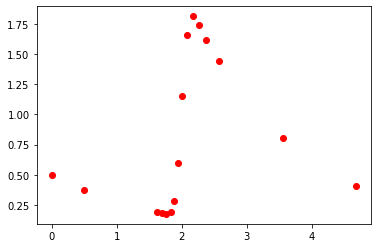

In [152]:
plt.figure()
plt.plot(xs, ys, 'ro')
plt.show()